In [1]:
import pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Handle Seaborn canvas

In [2]:
sns.set_context(rc = {'patch.linewidth': 0.1})

Loading DataFrame

In [3]:
df = pd.read_csv('UPFALL_dataset.csv',skiprows=2, header=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 47 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       294678 non-null  object 
 1   1       294678 non-null  float64
 2   2       294678 non-null  float64
 3   3       294678 non-null  float64
 4   4       294678 non-null  float64
 5   5       294678 non-null  float64
 6   6       294678 non-null  float64
 7   7       294678 non-null  float64
 8   8       258569 non-null  float64
 9   9       258569 non-null  float64
 10  10      258569 non-null  float64
 11  11      258569 non-null  float64
 12  12      258569 non-null  float64
 13  13      258569 non-null  float64
 14  14      258569 non-null  float64
 15  15      294678 non-null  float64
 16  16      294678 non-null  float64
 17  17      294678 non-null  float64
 18  18      294678 non-null  float64
 19  19      294678 non-null  float64
 20  20      294678 non-null  float64
 21  21      29

Renaming Columns

In [5]:
columnlist = ['Timestamp',
              'Ankel_acc_x','Ankel_acc_y','Ankel_acc_z','Ankel_ang_x','Ankel_ang_y','Ankel_ang_z','Ankel_lumi',
              'Rightpocket_acc_x','Rightpocket_acc_y','Rightpocket_acc_z','Rightpocket_ang_x','Rightpocket_ang_y','Rightpocket_ang_z','Rightpocket_lumi',
              'Belt_acc_x','Belt_acc_y','Belt_acc_z','Belt_ang_x','Belt_ang_y','Belt_ang_z','Belt_lumi',
              'Neck_acc_x','Neck_acc_y','Neck_acc_z','Neck_ang_x','Neck_ang_y','Neck_ang_z','Neck_lumi',
              'Wrist_acc_x','Wrist_acc_y','Wrist_acc_z','Wrist_ang_x','Wrist_ang_y','Wrist_ang_z','Wrist_lumi',
              'BrainSensor',
              'Infrared1','Infrared2','Infrared3','Infrared4','Infrared5','Infrared6',
              'Subject',
              'Activity',
              'Trail',
              'Tag']

In [6]:
colummapper = dict(zip([x for x in range(47)], columnlist))


In [7]:
df.rename(columns=colummapper, inplace=True)

Distribution plots of samples of each subject

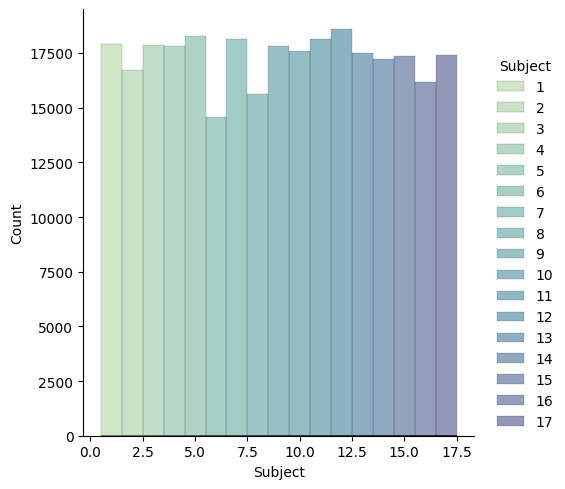

In [8]:
sns.displot(df, x='Subject', discrete=True, palette="crest", hue='Subject')

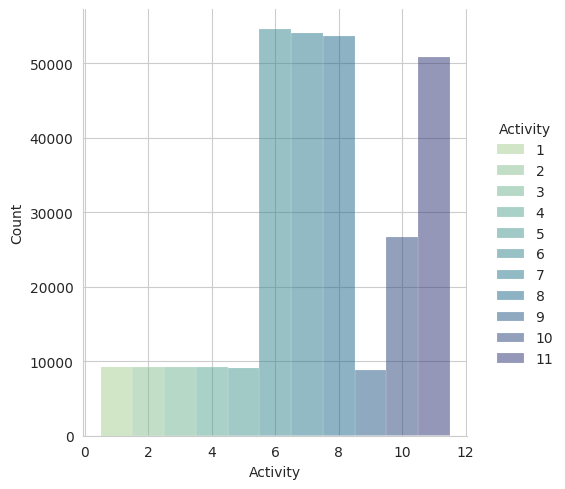

In [15]:
sns.displot(df, x='Activity', discrete=True, palette="crest", hue='Activity')

Distribution of sample for each subject and each activity

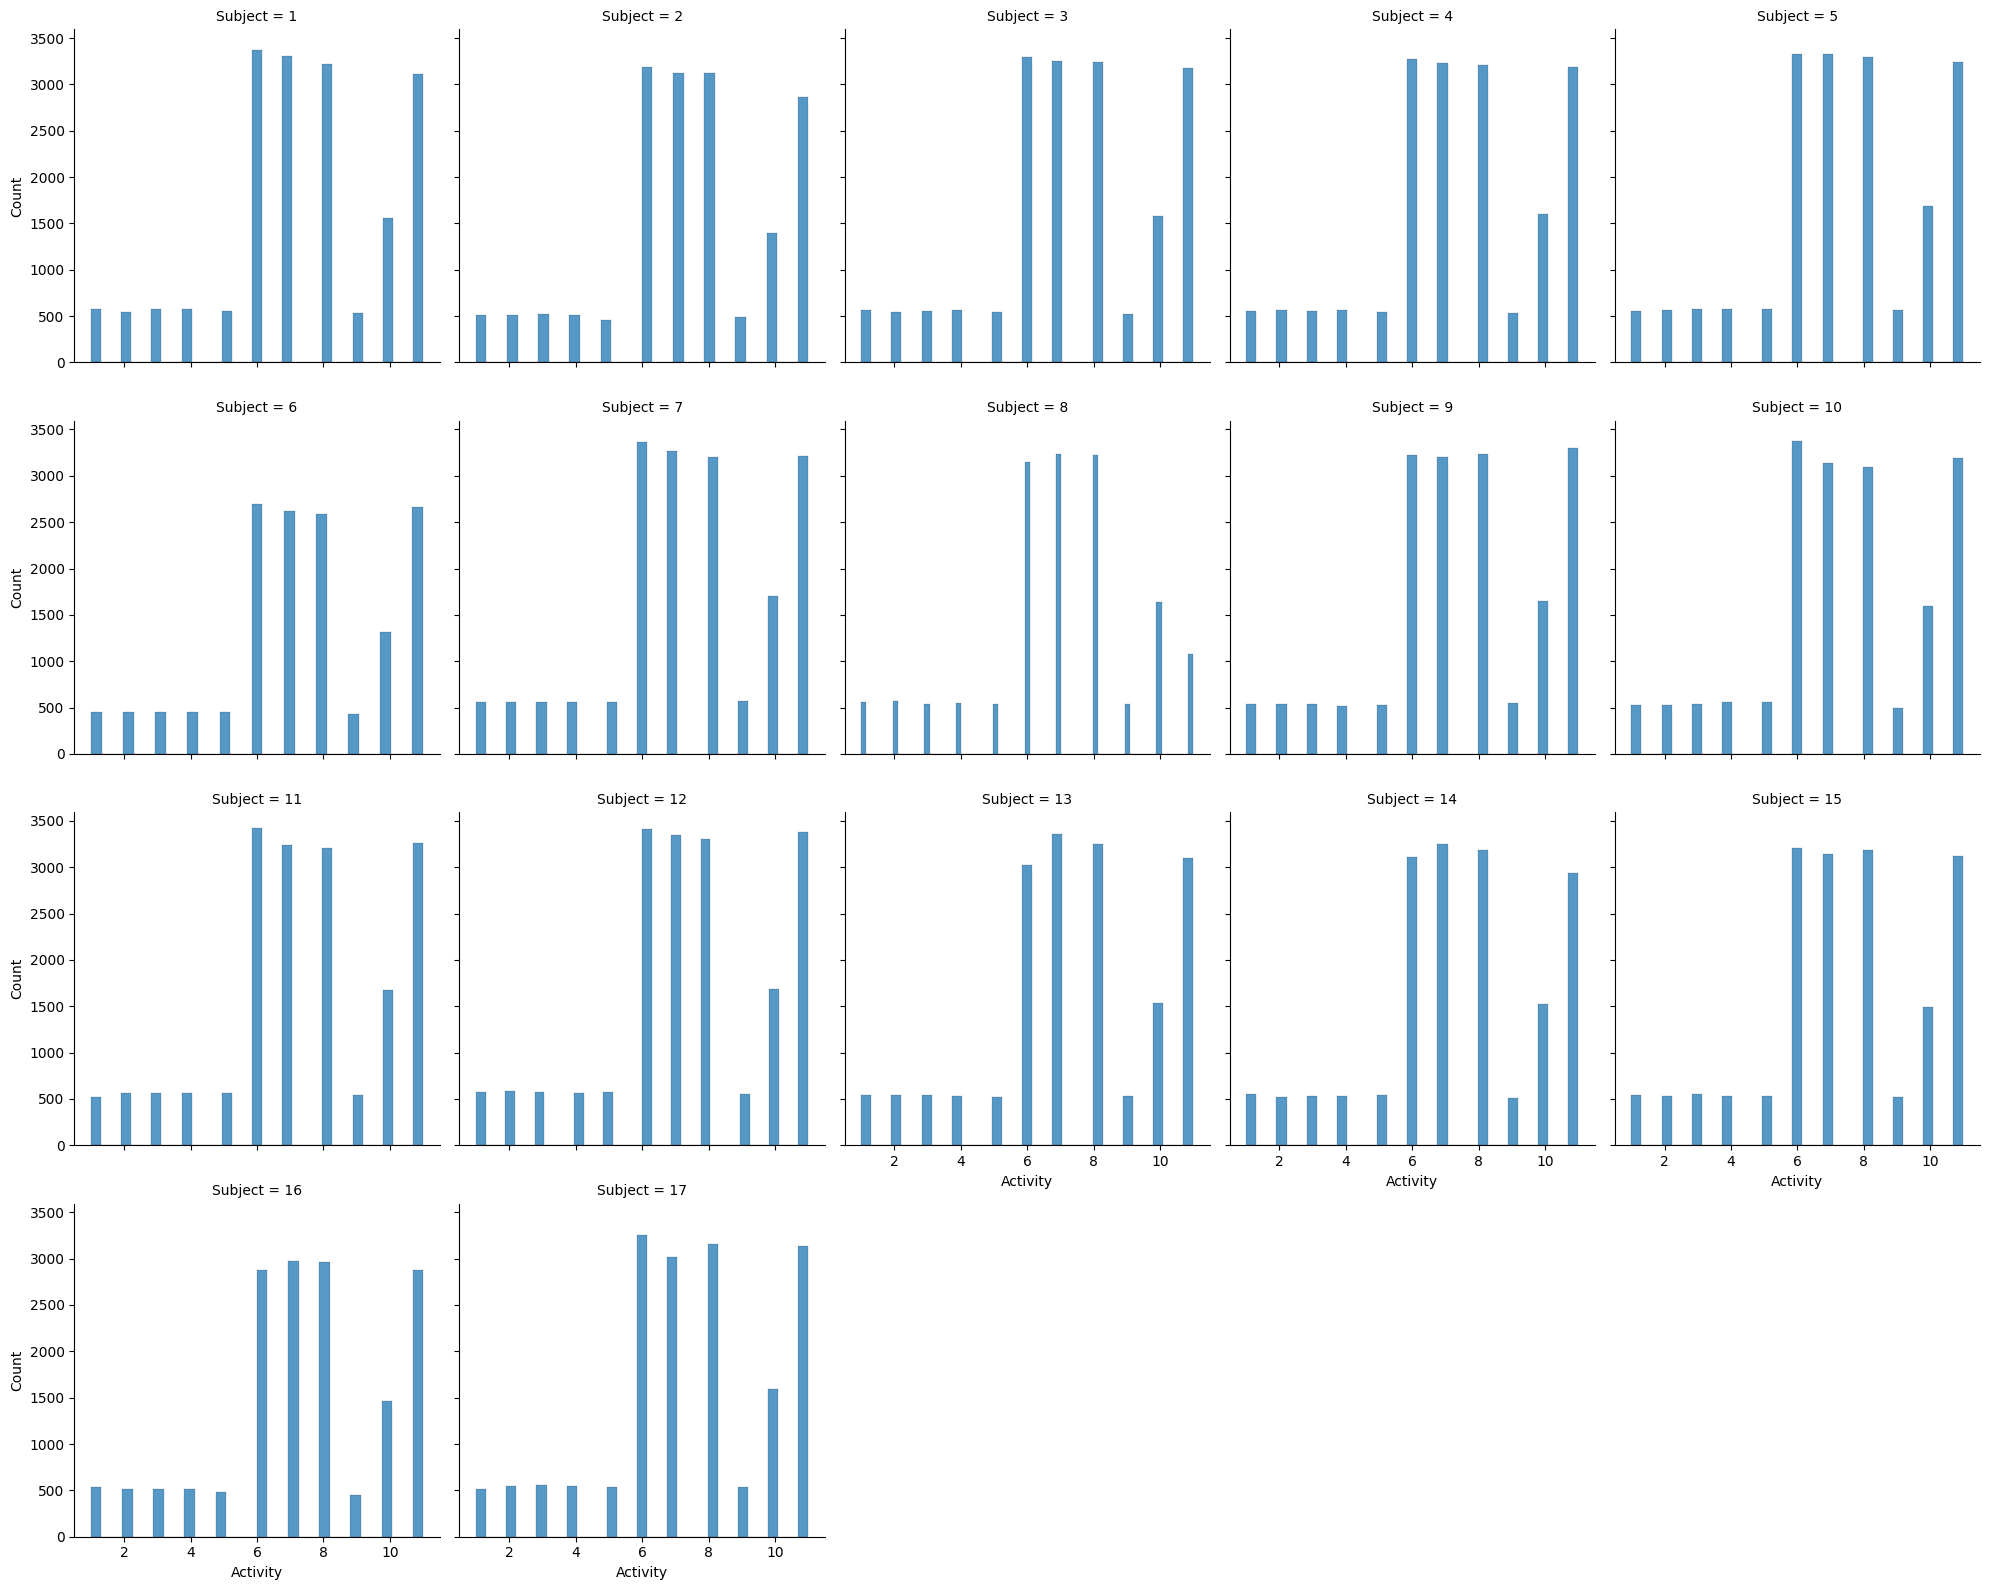

In [10]:
g = sns.FacetGrid(df, col="Subject", height=4, col_wrap=5)
g.map(sns.histplot, "Activity")

Same plot but bigger graphs

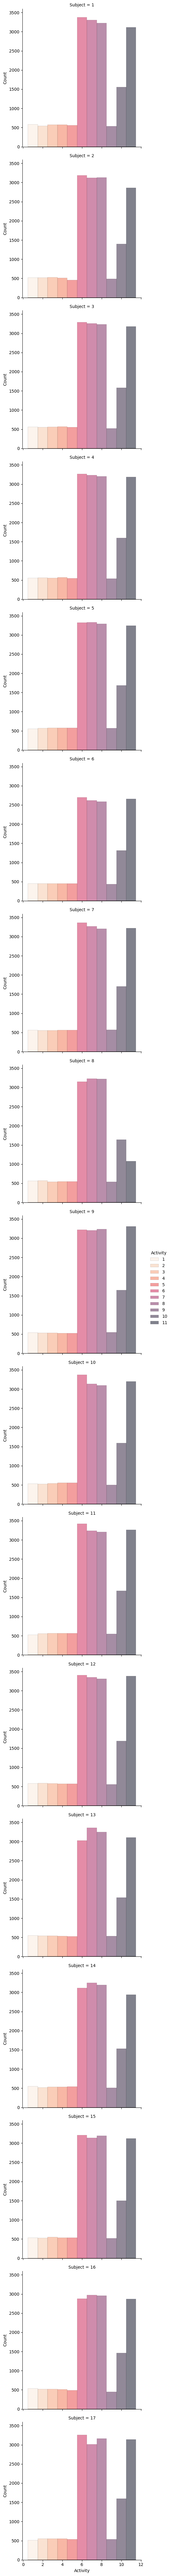

In [11]:
sns.displot(df, x='Activity', discrete = True, hue='Activity',row='Subject', palette='rocket_r')

3D scatter plots using Ankel Acclemometer data as example

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


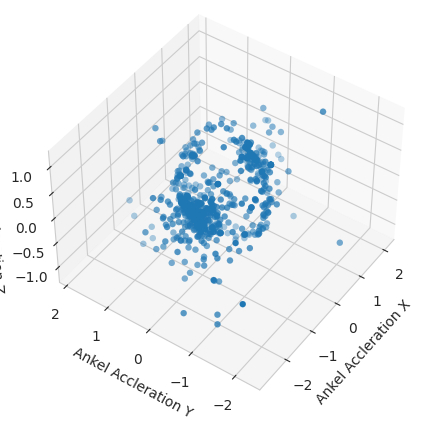

In [12]:
sns.set_style("whitegrid")

plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
print(type(axes))

plot_df = df.groupby('Subject').sample(n=50, random_state=1)

axes.scatter3D(plot_df['Ankel_acc_x'], plot_df['Ankel_acc_y'], plot_df['Ankel_acc_z'])

axes.set_xlabel('Ankel Accleration X')
axes.set_ylabel('Ankel Accleration Y')
axes.set_zlabel('Ankel Accleration Z')

axes.view_init(45, 215)
plt.show()

Distribution plot of luminosity, using Ankel sensor as example

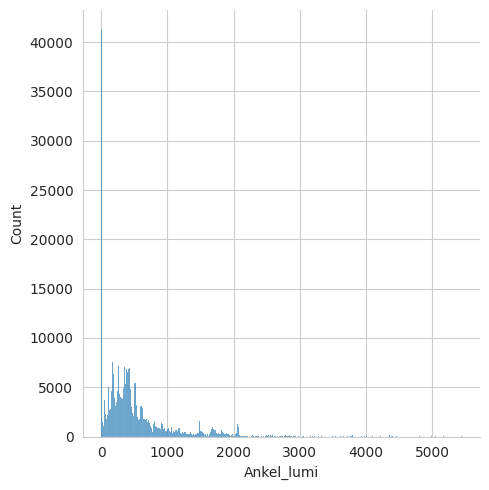

In [13]:
sns.displot(df, x='Ankel_lumi')

Correlation Matrix, excluded Subject, Activity, Trail and Tag

<AxesSubplot: >

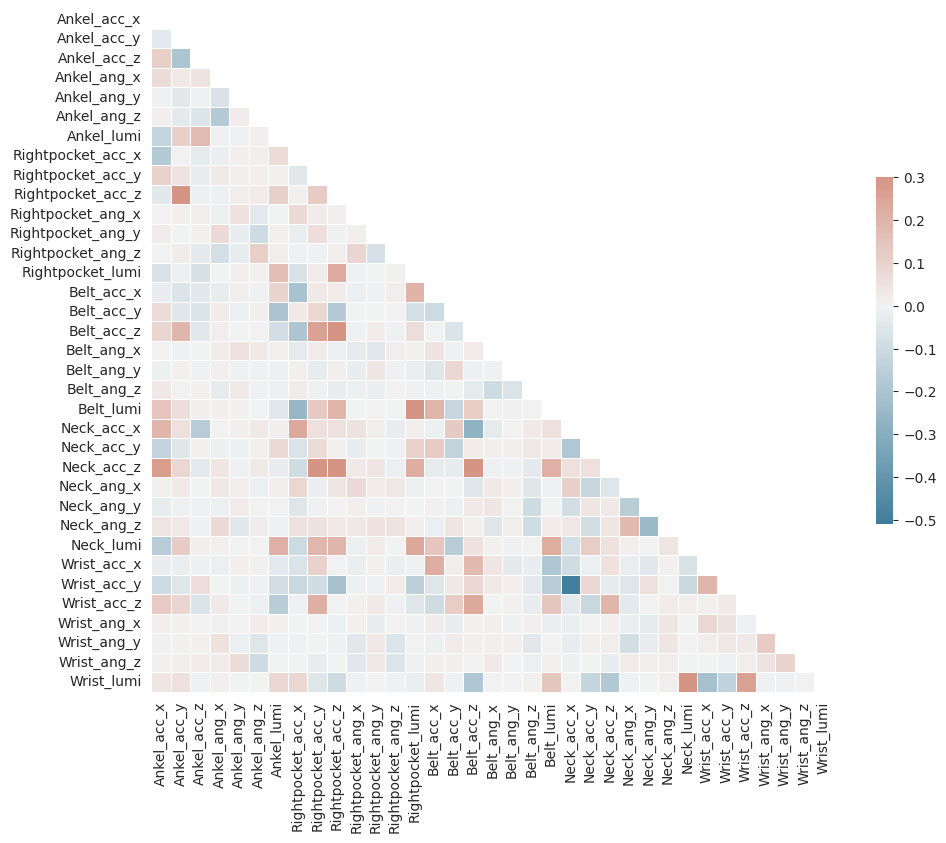

In [14]:
corr_df = df.iloc[:,1:36]

corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e0e26f6-0d34-49f5-8e85-f3cc34f3f75f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>